In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
dataset = pd.read_csv('/data/DCAIS_vessels_Classes[30, 37, 80, 60]_None-mmsi_01-04_to_30-04_trips.csv', parse_dates=['time'])

dataset['time'] = dataset['time'].astype('datetime64[ns]')



In [26]:
dataset = dataset.sort_values(by=['trajectory', "time"])

In [35]:
traj_length = dataset.groupby('trajectory').count()['cog']
print('length of each trajectory -- each trajectory is corresponding to a different vessel')
traj_length

length of each trajectory -- each trajectory is corresponding to a different vessel


trajectory
0        9071
1        1281
2         923
3        1296
4       14120
        ...  
7666     2885
7667     1490
7668     9198
7669     3004
7670     1952
Name: cog, Length: 7671, dtype: int64

<AxesSubplot:xlabel='trajectory'>

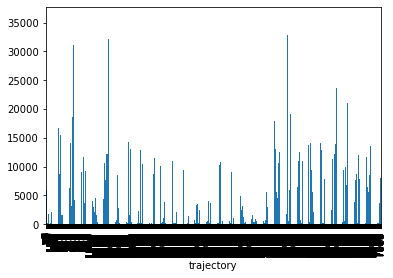

In [55]:
ax = traj_length.plot.bar()
ax.set_ylabel("length of each trajectory in the whole dataset")

In [36]:
print('number of samples from each vessel type')
vessel_type_nsample = dataset.groupby('vessel_type').count()['cog']
vessel_type_nsample

number of samples from each vessel type


vessel_type
30    10690479
37    23838624
60    10816917
80     3636571
Name: cog, dtype: int64

Text(0, 0.5, 'sum of length of trajectories')

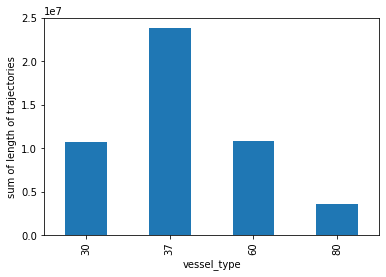

In [54]:
ax = vessel_type_nsample.plot.bar()
ax.set_ylabel("sum of length of trajectories")

In [48]:
print('number of trajectories for each vessel type')
vessel_trajectories = dataset.groupby('vessel_type')['trajectory'].nunique()
vessel_trajectories

number of trajectories for each vessel type


vessel_type
30    1499
37    4752
60     898
80     522
Name: trajectory, dtype: int64

Text(0, 0.5, 'number of unique vessels')

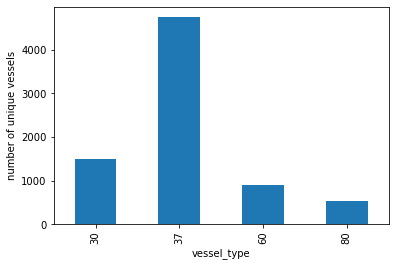

In [53]:
ax = vessel_trajectories.plot.bar()
# ax.set_xlabel("x label")
ax.set_ylabel("number of unique vessels")

In [ ]:
data = create_data(time_steps = 300, dataset_size = 1199)


In [ ]:
data.read_data(ds_name = '4class')

In [14]:
df = dataset.sort_values(by=['trajectory', "time"])

In [15]:
df

,trajectory,mmsi,time,lat,lon,sog,cog,vessel_type,flag,duration,total_time
0,0,0,2020-04-01 00:16:56,18.4595,-66.0902,0.0,6.0,30,0,0.0,719.626111
1,0,0,2020-04-01 00:22:55,18.4595,-66.0902,0.1,188.0,30,0,359.0,719.626111
2,0,0,2020-04-01 00:28:55,18.4595,-66.0901,0.0,323.2,30,0,360.0,719.626111
3,0,0,2020-04-01 00:34:56,18.4595,-66.0901,0.0,229.2,30,0,361.0,719.626111
4,0,0,2020-04-01 00:46:56,18.4595,-66.0901,0.0,108.6,30,0,720.0,719.626111
...,...,...,...,...,...,...,...,...,...,...,...
48982586,7670,367542970,2020-04-05 04:00:17,48.7573,-122.5059,0.0,30.7,37,United States of America,178.0,719.950833
48982587,7670,367542970,2020-04-05 04:03:18,48.7573,-122.5059,0.0,48.2,37,United States of America,181.0,719.950833
48982588,7670,367542970,2020-04-05 04:06:17,48.7573,-122.5059,0.0,38.0,37,United States of America,179.0,719.950833
48982589,7670,367542970,2020-04-05 04:09:16,48.7574,-122.5059,0.0,31.5,37,United States of America,179.0,719.950833


In [18]:
df.size,len(df)

(538808501, 48982591)

In [72]:
dataset_vessel60 = dataset[dataset['vessel_type'] == 60]
dataset_vessel60

,trajectory,mmsi,time,lat,lon,sog,cog,vessel_type,flag,duration,total_time
405877,86,227194000,2020-04-01 15:55:22,14.6168,-61.5738,11.1,168.8,60,France,0.0,246.788889
405878,86,227194000,2020-04-01 15:56:33,14.6132,-61.5731,11.2,168.7,60,France,71.0,246.788889
405879,86,227194000,2020-04-01 15:57:52,14.6092,-61.5722,11.2,169.3,60,France,79.0,246.788889
405880,86,227194000,2020-04-01 15:59:53,14.6029,-61.5711,11.3,170.0,60,France,121.0,246.788889
405881,86,227194000,2020-04-01 16:00:12,14.6020,-61.5709,11.4,169.9,60,France,19.0,246.788889
...,...,...,...,...,...,...,...,...,...,...,...
48938662,7657,367540420,2020-04-30 21:08:37,43.9271,-69.2609,2.0,175.7,60,United States of America,209.0,700.718056
48938663,7657,367540420,2020-04-30 21:09:38,43.9264,-69.2620,4.6,239.6,60,United States of America,61.0,700.718056
48938664,7657,367540420,2020-04-30 21:11:08,43.9260,-69.2635,0.6,171.1,60,United States of America,90.0,700.718056
48938665,7657,367540420,2020-04-30 21:12:37,43.9260,-69.2634,0.0,85.2,60,United States of America,89.0,700.718056


In [ ]:
dataset_vessel80 = dataset[dataset['vessel_type'] == 80]
dataset_vessel80

In [74]:
n_vessel60 = dataset_vessel60['trajectory'].nunique()
print(f'number of vessels in vessel type = 60 is {n_vessel60}')

number of vessels in vessel type = 60 is 898


In [59]:
n_vessel80 = dataset_vessel80['trajectory'].nunique()
print(f'number of vessels in vessel type = 80 is {n_vessel80}')

number of vessels in vessel type = 80 is 522


In [69]:
vessel80_trajs_length = dataset_vessel80.groupby('trajectory').count()['cog']
print('length of each trajectory in vessel type 80')
vessel80_trajs_length

length of each trajectory in vessel type 80


trajectory
4       14120
14       6763
15        414
16       1402
17      10153
        ...  
6864    29838
7140     9842
7143    11771
7149    18194
7502    18470
Name: cog, Length: 522, dtype: int64

Text(0, 0.5, 'length of trajectories of vessel type 80')

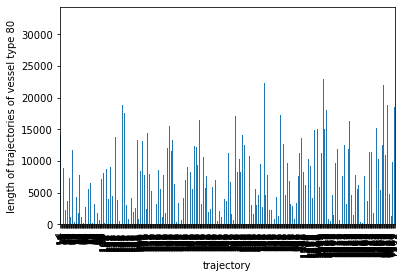

In [71]:
ax = vessel80_trajs_length.plot.bar()
ax.set_ylabel("length of trajectories of vessel type 80")

In [ ]:
vessel_type = [80,30]
for v in vessel_type:
    df_v = dataset[dataset['vessel_type']==v]

In [ ]:
for ti in range(df.size):
    df_traj = dataset[dataset['trajectory']==ti]
    df_sog = df.loc[:,'sog']
    df_sog.dropna()

In [ ]:
print('vessel_type : category')
print('vessel : samples')
print('vessel trips : segments')
print('the number of trips for each sample')
print('the number of samples for each category')
print('the length of each segment for each sample')
print('the number of segments for each sample')
print('max length and the min length of trips')
print('segmentation based change in the movement')
print('segmentation based on the duration of silent time')
print('what are the time points at which the vessel is silent/stopped')
